In [119]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Regression

Term regression is used when need to find relationship ($r$) between variables.

# Linear Regression

Linear regression is used to find the common sector of multiple variables/data points and draw a straight line between them which allows to predict future values around the sector as well use in Machine Learning.


In [120]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

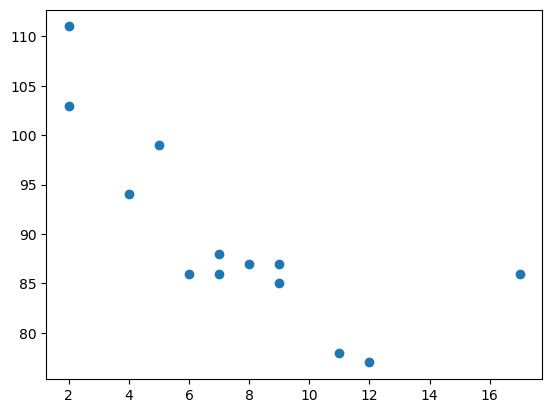

In [121]:
plt.scatter(x, y)
plt.show()

In [122]:
slope, intercept, _, _, _ = stats.linregress(x, y)
print(slope, intercept)

-1.751287711552612 103.10596026490066


In [123]:
def func(x):
    return slope * x + intercept

model = list(map(func, x))
model

[94.3495217071376,
 90.84694628403237,
 89.09565857247976,
 90.84694628403237,
 99.60338484179543,
 73.33406916850626,
 99.60338484179543,
 87.34437086092716,
 96.1008094186902,
 83.84179543782193,
 82.09050772626932,
 87.34437086092716,
 92.59823399558499]

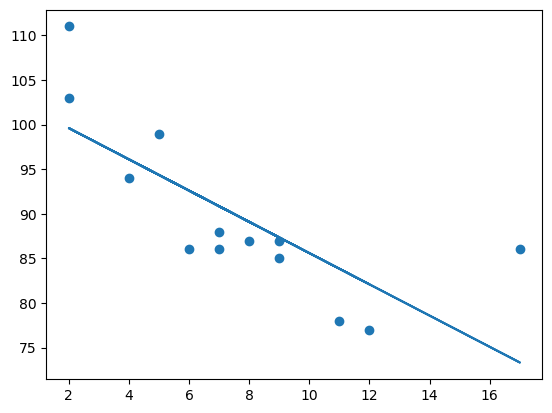

In [124]:
plt.scatter(x, y)
plt.plot(x, model)
plt.show()

### $r$ for Relationship

This relationship - the coefficient of correlation - is called $r$. The $r$ value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related.

In [125]:
slope, intercept, r, p, _ = stats.linregress(x, y)
r

-0.7585915243761551

> **Note:** The result -0.76 shows that there is a relationship, not perfect, but it indicates that we could use linear regression in future predictions.

### Predict Future Values when $r$ Value is Large

Now we have somewhat good relationship in **x** and **y** collections, try to predict the value _**speed**_ for 10 years old vehicle.

In [126]:
def new_func(x):
    return slope * x + intercept

In [127]:
new_speed10 = new_func(10)
new_speed20 = new_func(20)

new_speed10, new_speed20

(85.59308314937454, 68.08020603384841)

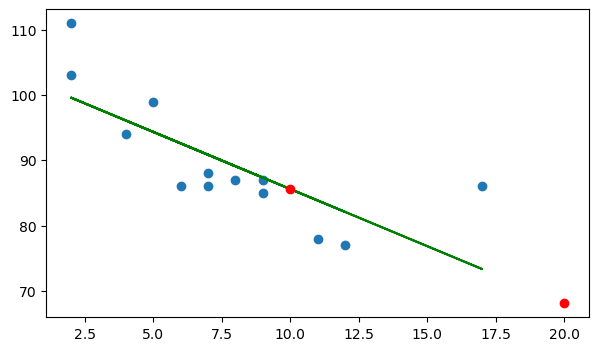

In [128]:
# Sample for - https://stackoverflow.com/questions/28504737/how-to-plot-a-single-point-in-matplotlib
fig, ax = plt.subplots(1, 1, figsize=(7, 4))

plt.scatter(x, y)
plt.plot(x, model, '-g')
plt.plot(10, new_speed10, 'ro')
plt.plot(20, new_speed20, 'ro')
plt.show()

### Bad Fit (When $r$ Value is Too Small)

In [129]:
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

In [130]:
slope, intercept, r, _, _ = stats.linregress(x, y)
slope, intercept, r

(0.013916581398452667, 40.452282828936454, 0.013318141542974947)

In [131]:
def func(x):
    return slope * x + intercept

In [132]:
model = list(map(func, x))
model

[41.69085857339874,
 41.050695829069916,
 40.95327975928075,
 40.95327975928075,
 41.77435806178946,
 40.59144864292098,
 41.37077720123433,
 40.925446596483845,
 40.981112922077656,
 40.730614456905506,
 40.81411394529622,
 40.85586368949158,
 41.12027873606218,
 41.34294403843742,
 40.53578231732717,
 40.52186573592872,
 40.95327975928075,
 41.37077720123433,
 41.45427668962505,
 41.00894608487456]

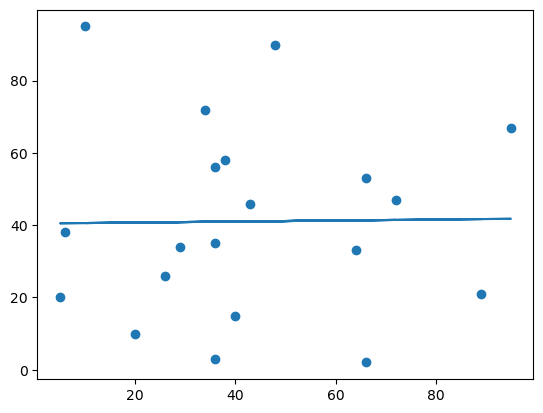

In [133]:
plt.scatter(x, y)
plt.plot(x, model)
plt.show()

> The result: $r = 0.013$ indicates a very bad relationship, and tells us that this data set is not suitable for linear regression.

# Polynomial Regression

If the dataset not fit through a straight line and not suitable for **Linear Regression**, it might be suitable for **Polynomial Regression**. Just like in linear regression, polynomial regression uses relationship between $x$ and $y$ variables to find the best path between a dataset.